# What makes Data Scientists stand out?

## Setup

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

%matplotlib inline

## Business/Data Understanding

What are they attributes of a Data Scientist? Do they differ from those of other coders. Can we predict who works as a Data Scientist based on other attributes in this dataset?

* Fields of interest - type of data, well populated, range of values, ...
* "Data Scientist" label

In [1]:
questions = pd.read_csv("data/survey_results_schema.csv")

questions

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [2]:
responses = pd.read_csv("data/survey_results_public.csv")

responses.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,88883.000000,88331,88883,88883,86842,87181,88751,87014,86390,75614,84260,71791,81335,87938,87634,74331,72847,70988,61159,61157,61232,80555,79854,67155,71344,79371,77877,71392,71392,5.594500e+04,63268,5.582300e+04,64503.000000,68914,68141,70284,70055,71779,70390,49790.000000,62668,61108,62029,87569,84088,76026,69147,80714,77443,65022,62944,59586,64511,87317,87851,85366,48175,60165,86269,87141,86663,84437,87305,80486,83877,88263,88086,87816,86344,68378,87828,74692,88066,87841,88131,85855,69560,79210.000000,85406,83607,76147,76668,83059,86984,87081
unique,NaN,5,2,4,3,6,179,3,9,12,492,9,13141,52,69,52,5,5,4,3,4,3,6,63,2,175,6,143,144,NaN,3,NaN,NaN,3,129,7,3,5,3,NaN,4,4,3,20098,27259,3478,3923,8731,10795,2142,2312,2783,5565,7716,4,21,5,5,2,4,3,14,3,5,13,6,63,5,5,4,3,6,3,3,6,6,15,NaN,7,2,7,196,2,3,3
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taught yourself a new language, framework, or tool without taking a formal course",20 to 99 employees,"Developer, full-stack",5,15,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Interview with people in peer roles;Interview with people in senior / management roles,No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development",I was preparing for a job search,USD,United States dollar,NaN,Yearly,NaN,NaN,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns",Being tasked with non-development work;Distracting work environment;Meetings,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",NaN,"Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,HTML/CSS;JavaScript;PHP;SQL,Python,MySQL,PostgreSQL,Windows,Linux,jQuery,React.js,Node.js,Node.js,Visual Studio Code,Windows,I do not use containers,Not at all,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Reddit,In real life (in person),Username,I don't remember,Daily or almost daily,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,NaN,65679,71257,32295,41527,64440,20949,65816,39134,47214,6699,15199,8433,7047,8681,795

In [3]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

Check which columns allow multiple answers

In [4]:
# responses.apply(lambda row: row.astype(str).str.contains(';').any(), axis=1).describe()
responses.apply(lambda x: x.astype(str).str.contains(';')).describe()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883
unique,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,2,1,2,2,1,1,1
top,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
freq,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,71708,88883,56171,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,51087,88883,78169,88883,88883,88883,88883,88883,88883,88883,67997,60424,88883,88883,88883,88883,88883,88883,88883,88883,83174,77670,55098,50469,62823,64795,44975,44807,55070,45315,70571,88883,59503,88883,88883,88883,88883,88883,88883,88883,88883,88883,88883,52650,88883,88883,88883,88883,88883,88883,88883,88883,88883,53069,88883,88337,88883,88129,84299,88883,88883,88883


We now know what the questions were and broadly what kind of data we have in the responses.

### Target variable?

A simple thing next. How do we pre-classify people as Data Scientists so we have a target variable to evaluate against...

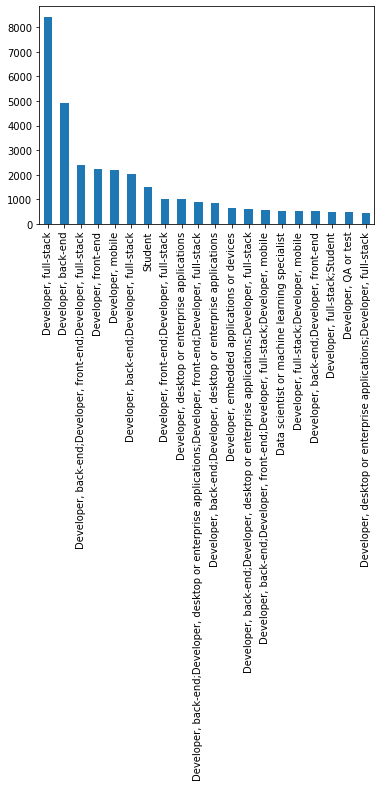

In [6]:
responses.DevType.value_counts()[:20].plot(kind="bar")

Each person may have selected many developer types. For our purposes anyone who selects "Data scientist or machine learning specialist" qualifies - regardless of what else they may select.

In [7]:
dsFilter = responses.DevType.str.contains("Data scientist or machine learning specialist").fillna(False)

print("There are {0} Data Scientists out of {1} respondents".format(len(responses[dsFilter]), len(responses)))

There are 6460 Data Scientists out of 88883 respondents


## Data Preparation

In [131]:
df = responses.copy()
df.shape

(88883, 85)

### Outliers

Firstly, I will generalise that we aren't interested about questions on Stackoverflow itself. This ideally will allow the model to be applicable to responses collected in other ways.

In [132]:
nonSOFields = ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents']

df = df[nonSOFields]

df.shape

(88883, 70)

### Feature extraction

Response can be divided into 3 groups:
1. Single-value categorical values
2. Multi-value categorical values
3. Numeric values

The first two groups need converting into numeric values.

In [70]:
sCatFields = ["MainBranch", "Hobbyist", "OpenSourcer", "OpenSource", "Employment", "Country", "Student",
              "EdLevel", "UndergradMajor", "OrgSize", "YearsCode", "Age1stCode", "YearsCodePro", "CareerSat",
              "JobSat", "MgrIdiot", "MgrMoney", "MgrWant", "JobSeek", "LastHireDate", "FizzBuzz", "ResumeUpdate",
              "CurrencySymbol", "CurrencyDesc", "CompFreq", "WorkRemote", "WorkLoc", "ImpSyn", "CodeRev",
              "UnitTests", "PurchaseHow", "PurchaseWhat", "OpSys", "BlockchainOrg", "BlockchainIs", "BetterLife",
              "ITperson", "OffOn", "SocialMedia", "Extraversion", "ScreenName", "Trans", "Dependents"]
df[sCatFields].describe()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompFreq,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,Trans,Dependents
count,88331,88883,88883,86842,87181,88751,87014,86390,75614,71791,87938,87634,74331,72847,70988,61159,61157,61232,80555,79854,71344,77877,71392,71392,63268,70284,70055,71779,70390,62668,61108,62029,87851,48175,60165,86269,87141,86663,84437,87305,80486,83607,83059
unique,5,2,4,3,6,179,3,9,12,9,52,69,52,5,5,4,3,4,3,6,2,6,143,144,3,7,3,5,3,4,4,3,4,5,5,2,4,3,14,3,5,2,2
top,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",20 to 99 employees,5,15,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,No,I was preparing for a job search,USD,United States dollar,Yearly,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review","Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,Windows,Not at all,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Reddit,In real life (in person),Username,No,No
freq,65679,71257,32295,41527,64440,20949,65816,39134,47214,15199,7047,8681,7959,29173,24207,25207,31346,22276,47260,25844,60873,33309,19490,19490,31505,30220,40592,32374,48424,26221,20424,26676,41714,38546,17596,54938,46370,67740,14374,52860,58969,82576,50727


In [71]:
mCatFields = ["EduOther", "LastInt", "JobFactors", "WorkPlan", "WorkChallenge", "LanguageWorkedWith",
              "LanguageDesireNextYear", "DatabaseWorkedWith", "DatabaseDesireNextYear", 
              "PlatformWorkedWith", "PlatformDesireNextYear", "WebFrameWorkedWith", 
              "WebFrameDesireNextYear", "MiscTechWorkedWith", "MiscTechDesireNextYear", 
              "DevEnviron", "Containers", "Gender", "Sexuality", "Ethnicity"]
df[mCatFields].describe()

,EduOther,LastInt,JobFactors,WorkPlan,WorkChallenge,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,Containers,Gender,Sexuality,Ethnicity
count,84260,67155,79371,68914,68141,87569,84088,76026,69147,80714,77443,65022,62944,59586,64511,87317,85366,85406,76147,76668
unique,492,63,175,3,129,20098,27259,3478,3923,8731,10795,2142,2312,2783,5565,7716,21,7,7,196
top,"Taught yourself a new language, framework, or tool without taking a formal course",Interview with people in peer roles;Interview with people in senior / management roles,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development","There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns",Being tasked with non-development work;Distracting work environment;Meetings,HTML/CSS;JavaScript;PHP;SQL,Python,MySQL,PostgreSQL,Windows,Linux,jQuery,React.js,Node.js,Node.js,Visual Studio Code,I do not use containers,Man,Straight / Heterosexual,White or of European descent
freq,6699,12383,4992,34476,2318,1483,1236,5556,3539,7031,3280,4171,3744,10571,6913,5036,39327,77919,70155,50929


In [72]:
numFields = ["Respondent", "CompTotal", "ConvertedComp", "WorkWeekHrs", "CodeRevHrs", "Age"]
df[numFields].describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [133]:
df["Data Scientist"] = dsFilter.astype(int)

df["Data Scientist"].value_counts()

0    82423
1     6460
Name: Data Scientist, dtype: int64

### Feature selection

It's still quite a long list of features. Far too many for the size of dataset.

In [135]:
import numpy as np

# First pass we'll hand pick a few fields to work with

# df = df[["MainBranch", "Hobbyist", "OpenSourcer", "EdLevel",  "OrgSize",
#         "ConvertedComp", "WorkWeekHrs", "CodeRevHrs", "Age", "Data Scientist"]]

# for var in ["MainBranch", "Hobbyist", "OpenSourcer", "EdLevel",  "OrgSize"]:
for var in df.columns:
#     if df[var].dtype == np.float64 or df[var].dtype == np.int64:
#         continue

    if df[var].dtype == np.object_:
        if df[var].str.contains(";").any():
            df = df.drop([var], axis=1)
        else:
            df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)        

#     if var in sCatFields:
#         # for each cat add dummy var, drop original column
#         df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
#     elif var in numFields:
#         continue
#     else:
#         df.drop([var], axis=1)

# df.describe()
df.shape

(88883, 775)

In [136]:
df.columns

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age', 'Data Scientist',
       'MainBranch_I am a student who is learning to code',
       'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work',
       'MainBranch_I code primarily as a hobby',
       ...
       'SocialMedia_YouTube', 'SocialMedia_Youku Tudou 优酷',
       'Extraversion_Neither', 'Extraversion_Online', 'ScreenName_Login',
       'ScreenName_Screen Name', 'ScreenName_UserID', 'ScreenName_Username',
       'Trans_Yes', 'Dependents_Yes'],
      dtype='object', length=775)

In [76]:
# kbest = 40

# y = df['Data Scientist']
# X = df.drop(['Data Scientist'], axis=1)

# from sklearn.feature_selection import SelectKBest, f_classif
# # from sklearn.tree import DecisionTreeClassifier

# # dt_clf = DecisionTreeClassifier(random_state=1)
# # dt_clf.fit(X, y)

# # # selected_features_list = ["Data Scientist"] ## always included
# # # print("\n\n")
# # # print("Finding most important features...")
# # # for n, imp in enumerate(clf.feature_importances_):
# # #     print "{0}, {1}, {2}".format(n, features_list[n+1], imp)
# # #     if imp > MINIMP:
# # #         kbest+=1
# # #         selected_features_list.append(features_list[n+1])

# # print("Selecting {0} best features...".format(kbest))
# selector = SelectKBest(f_classif, k=kbest)
# selector.fit(X, y)

# selected_features = selector.transform(X)

# selected_features

ValueError: could not convert string to float: 'I am a student who is learning to code'

### Missing values - Remove/Impute/Work around

We can't really predict for people who haven't selected a DevType as we have nothing to judge against. Otherwise, for now, we will assume that missing values might be indicative.

In [137]:
# df.dropna(subset=["DevType"], axis=0, inplace=True)
df.dropna(axis=0, inplace=True)
# df.dropna(axis=1, how="all", inplace=True)
df.shape

(39390, 775)

### Feature scaling

Now that we have a list of numeric features we can scale them all to give an equal weighting in our model

In [138]:
scaler = MinMaxScaler()
# StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.shape

C:\Users\adeacon\AppData\Local\Continuum\miniconda3\envs\projects\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(39390, 775)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BB5D2E1AC8>,
      dtype=object)

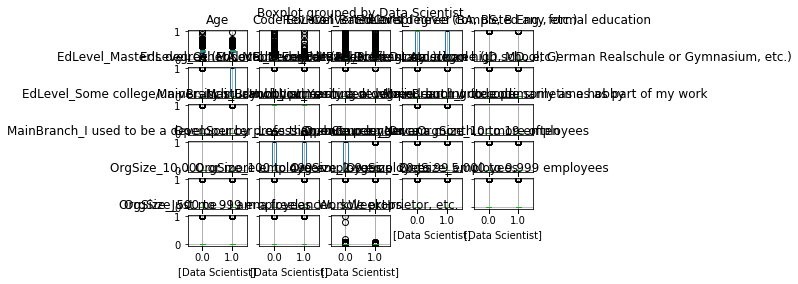

In [62]:
# df.boxplot(by="Data Scientist")

## Modelling

* Test/train split - cross validation?
* Model selection - Naive Bayes, Ada Boost, Random Forest, XG Boost
* Hyperparameters?

### Split features from target variable

In [139]:
labels = df['Data Scientist']
features = df.drop(['Data Scientist'], axis=1)
features.shape, labels.shape

((39390, 774), (39390,))

In [140]:
features.describe(include="all")

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,"MainBranch_I used to be a developer by profession, but no longer am",Hobbyist_Yes,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,"OpenSource_OSS is, on average, of LOWER quality than proprietary / closed source software",OpenSource_The quality of OSS and closed source software is about the same,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed","Employment_Not employed, and not looking for work","Employment_Not employed, but looking for work",Employment_Retired,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,...,CurrencyDesc_SDR (Special Drawing Right),CurrencyDesc_Samoan tala,CurrencyDesc_Saudi Arabian riyal,CurrencyDesc_Serbian dinar,CurrencyDesc_Seychellois rupee,CurrencyDesc_Sierra Leonean leone,CurrencyDesc_Singapore dollar,CurrencyDesc_Somali shilling,CurrencyDesc_South African rand,CurrencyDesc_South Korean won,CurrencyDesc_Sri Lankan rupee,CurrencyDesc_Sudanese pound,CurrencyDesc_Surinamese dollar,CurrencyDesc_Swazi lilangeni,CurrencyDesc_Swedish krona,CurrencyDesc_Swiss franc,CurrencyDesc_Syrian pound,CurrencyDesc_Tajikistani somoni,CurrencyDesc_Tanzanian shilling,CurrencyDesc_Thai baht,CurrencyDesc_Trinidad and Tobago dollar,CurrencyDesc_Tunisian dinar,CurrencyDesc_Turkish lira,CurrencyDesc_Turkmen manat,CurrencyDesc_Ugandan shilling,CurrencyDesc_Ukrainian hryvnia,CurrencyDesc_United Arab Emirates dirham,CurrencyDesc_United States dollar,CurrencyDesc_Uruguayan peso,CurrencyDesc_Uzbekistani som,CurrencyDesc_Vanuatu vatu,CurrencyDesc_Venezuelan bolivar,CurrencyDesc_Vietnamese dong,CurrencyDesc_West African CFA franc,CurrencyDesc_Yemeni rial,CurrencyDesc_Zambian kwacha,CurrencyDesc_e Cook Islands dollar,CurrencyDesc_e Faroese krona,CompFreq_Weekly,CompFreq_Yearly,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time",WorkLoc_Office,"WorkLoc_Other place, such as a coworking space or cafe",ImpSyn_A little below average,ImpSyn_Average,ImpSyn_Far above average,ImpSyn_Far below average,"CodeRev_Yes, because I see value in code review","CodeRev_Yes, because I was told to do so","UnitTests_No, but I think we should","UnitTests_Yes, it's not part

### Test/train split

In [141]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.1, random_state=42)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((35451, 774), (3939, 774), (35451,), (3939,))

### Naive Bayes model

In [146]:
all_metrics = {}

def metrics_data(title, labels, predictions):
    return {title: 
               {"accuracy": accuracy_score(labels, predictions),
                "precision": precision_score(labels, predictions),
                "recall": recall_score(labels, predictions),
                "f1-score": f1_score(labels, predictions)
               }
              }
    
nb_clf = GaussianNB()

nb_clf.fit(features_train, labels_train)

nb_pred = nb_clf.predict(features_test)

nb_metrics = metrics_data("Naive Bayes", labels_test, nb_pred)

all_metrics.update(nb_metrics)

nb_metrics

{'Naive Bayes': {'accuracy': 0.0853008377760853,
  'precision': 0.07198142414860681,
  'recall': 0.9789473684210527,
  'f1-score': 0.13410237923576063}}

### Ada Boost model

In [147]:
ab_clf = AdaBoostClassifier()

ab_clf.fit(features_train, labels_train)

ab_pred = ab_clf.predict(features_test)

ab_metrics = metrics_data("Ada Boost", labels_test, ab_pred)

all_metrics.update(ab_metrics)

ab_metrics

{'Ada Boost': {'accuracy': 0.9279004823559279,
  'precision': 0.5142857142857142,
  'recall': 0.06315789473684211,
  'f1-score': 0.11250000000000002}}

### Gradient Boost model

In [148]:
gb_clf = GradientBoostingClassifier()

gb_clf.fit(features_train, labels_train)

gb_pred = gb_clf.predict(features_test)

ab_metrics = metrics_data("Gradient Boost", labels_test, gb_pred)

all_metrics.update(gb_metrics)

gb_metrics

{'Gradient Boost': {'accuracy': 0.9286620969789287,
  'precision': 0.5833333333333334,
  'recall': 0.04912280701754386,
  'f1-score': 0.09061488673139158}}

## Evaluation

* Count/duration
* Accuracy, Precision/Recall, F1, F2

In [149]:
pd.DataFrame(all_metrics).T

,accuracy,f1-score,precision,recall
Naive Bayes,0.085301,0.134102,0.071981,0.978947
Ada Boost,0.927900,0.112500,0.514286,0.063158
Gradient Boost,0.928662,0.090615,0.583333,0.049123


## Deployment

* Summarise findings
* Next steps